In [1]:
# benin_eda.ipynb

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
%matplotlib inline


# Load Data
data_path = '../data/benin-malanville.csv'
df = pd.read_csv(data_path)
df['Timestamp'] = pd.to_datetime(df['Timestamp']) 

## Summary Statistics & Missing-Value Report

In [2]:
print("Summary Statistics:")
print(df.describe())

print("\nMissing Values:")
missing = df.isna().sum()
print(missing)
print("\nColumns with >5% Missing:")
missing_pct = missing / len(df) * 100
print(missing_pct[missing_pct > 5])

Summary Statistics:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50% 

## Outlier Detection & Basic Cleaning

Number of outlier rows: 7740


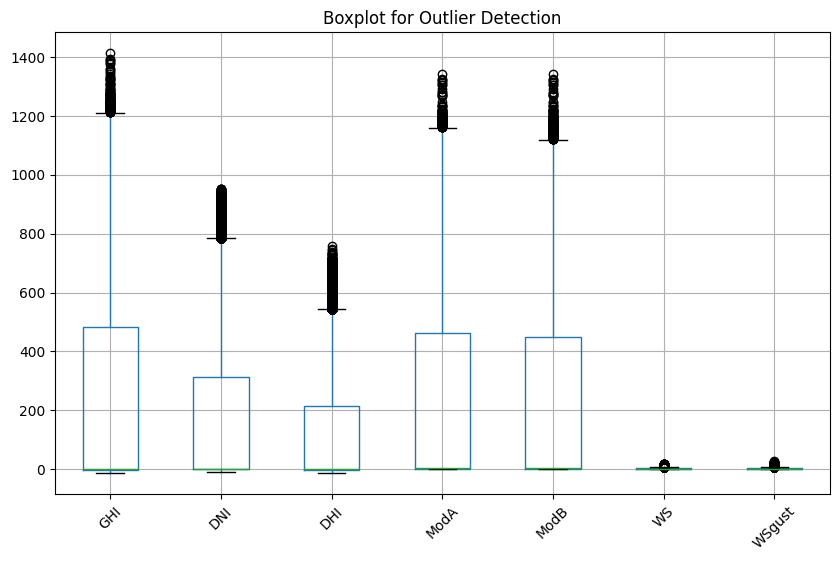

Cleaned data saved to data/benin_clean.csv


In [12]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[key_cols].apply(stats.zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Number of outlier rows: {outliers.sum()}")

plt.figure(figsize=(10, 6))
df[key_cols].boxplot()
plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation=45)
os.makedirs('../notebooks/figures/benin', exist_ok=True)
plt.savefig('../notebooks/figures/benin/boxplot_outliers.png')
plt.show()

for col in key_cols:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

df = df.dropna(subset=['GHI'])
os.makedirs('../data', exist_ok=True)
df.to_csv('../data/benin_clean.csv', index=False)
print("Cleaned data saved to data/benin_clean.csv")

## Time Series Analysis

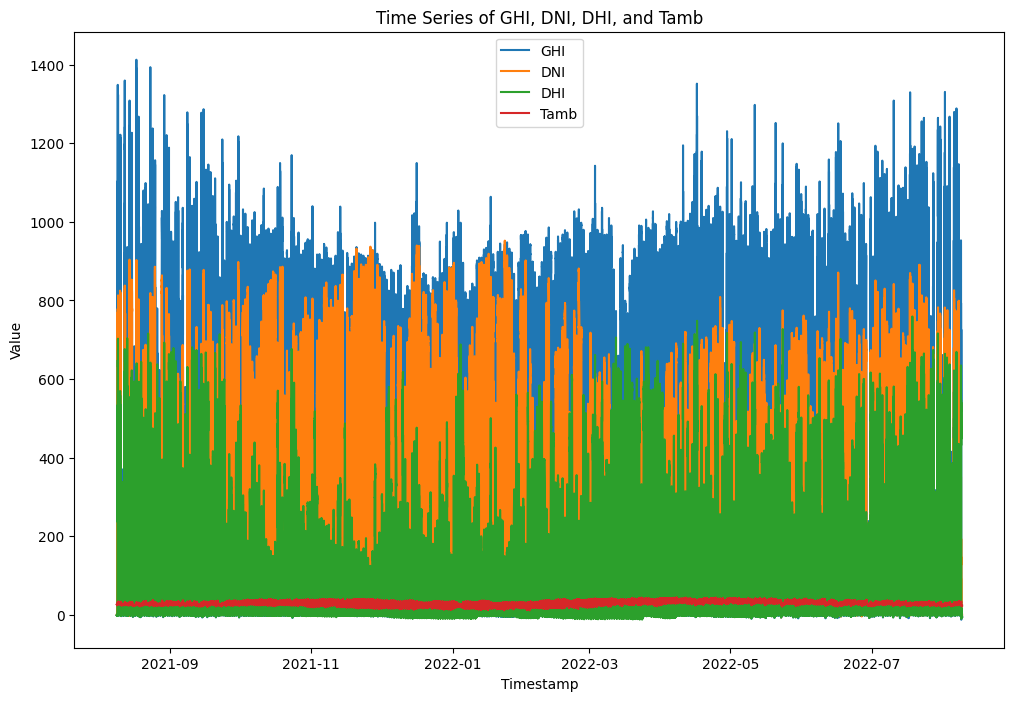

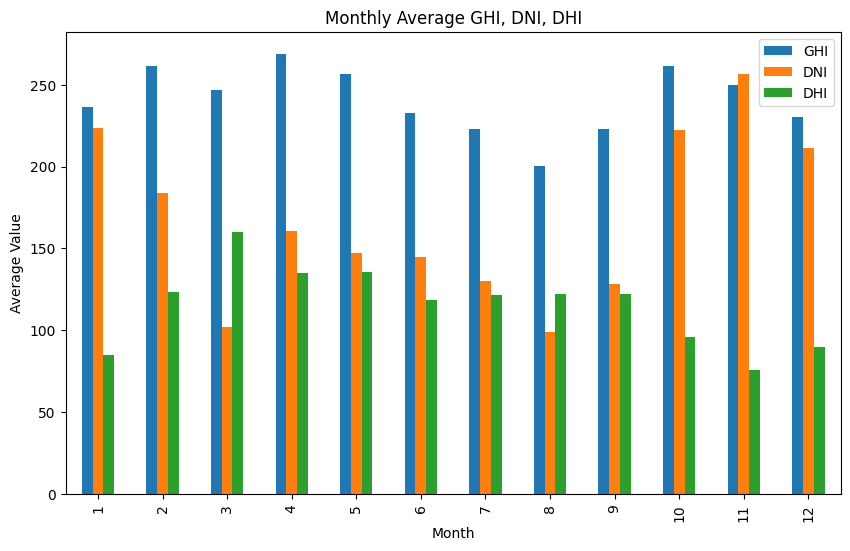

In [13]:
plt.figure(figsize=(12, 8))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df['Timestamp'], df[col], label=col)
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.savefig('../notebooks/figures/benin/time_series.png')
plt.show()

df['Month'] = df['Timestamp'].dt.month
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI']].mean()
monthly_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Average GHI, DNI, DHI')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.savefig('../notebooks/figures/benin/monthly_trends.png')
plt.show()

## Cleaning Impact

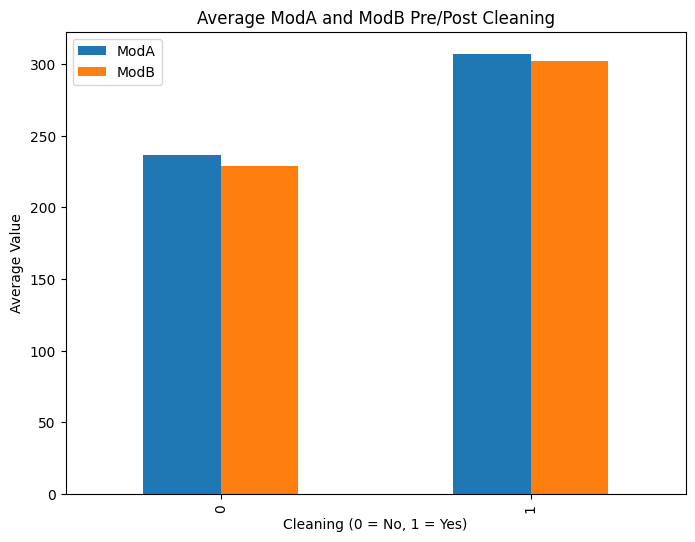

In [14]:
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
cleaning_impact.plot(kind='bar', figsize=(8, 6))
plt.title('Average ModA and ModB Pre/Post Cleaning')
plt.xlabel('Cleaning (0 = No, 1 = Yes)')
plt.ylabel('Average Value')
plt.savefig('../notebooks/figures/benin/cleaning_impact.png')
plt.show()

## Correlation & Relationship Analysis

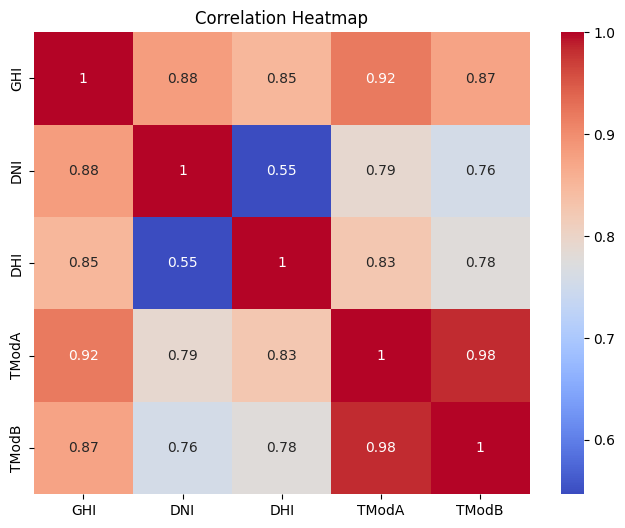

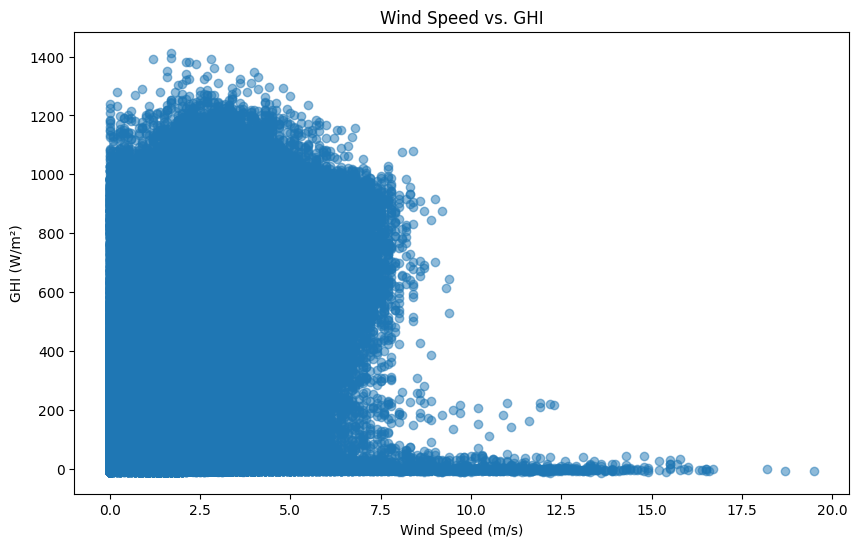

In [15]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('../notebooks/figures/benin/corr_heatmap.png')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['WS'], df['GHI'], alpha=0.5)
plt.title('Wind Speed vs. GHI')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.savefig('../notebooks/figures/benin/ws_vs_ghi.png')
plt.show()

## Wind & Distribution Analysis

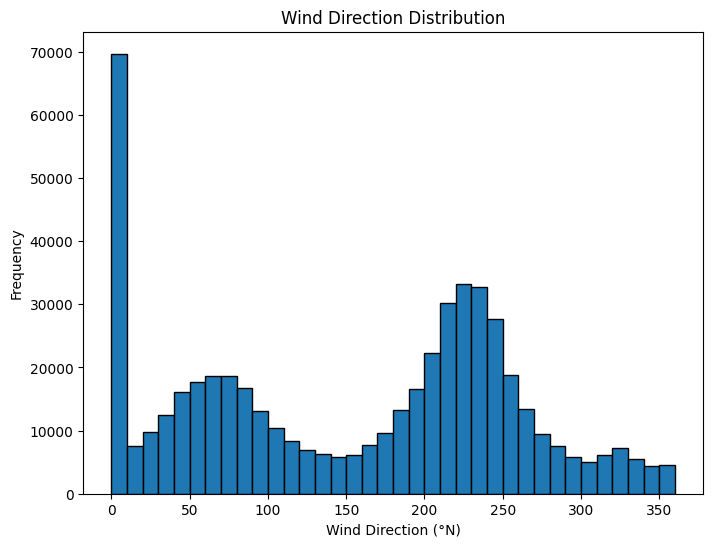

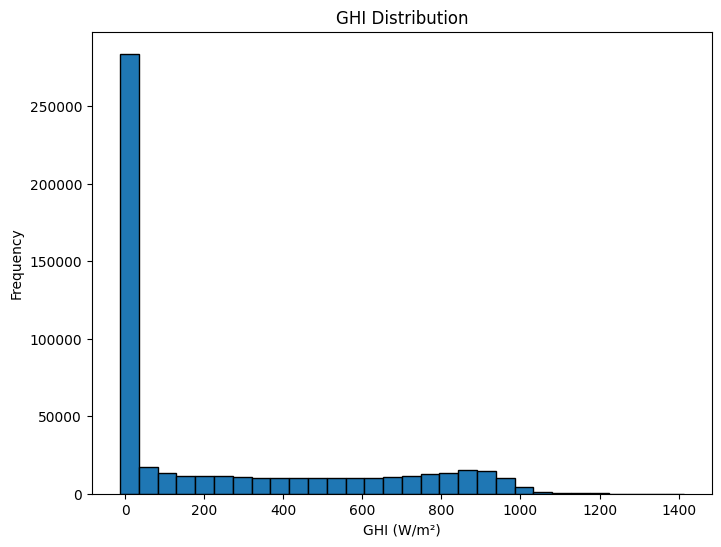

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(df['WD'], bins=36, edgecolor='black')
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction (°N)')
plt.ylabel('Frequency')
plt.savefig('../notebooks/figures/benin/wind_direction.png')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(df['GHI'], bins=30, edgecolor='black')
plt.title('GHI Distribution')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.savefig('../notebooks/figures/benin/ghi_histogram.png')
plt.show()

## Temperature Analysis

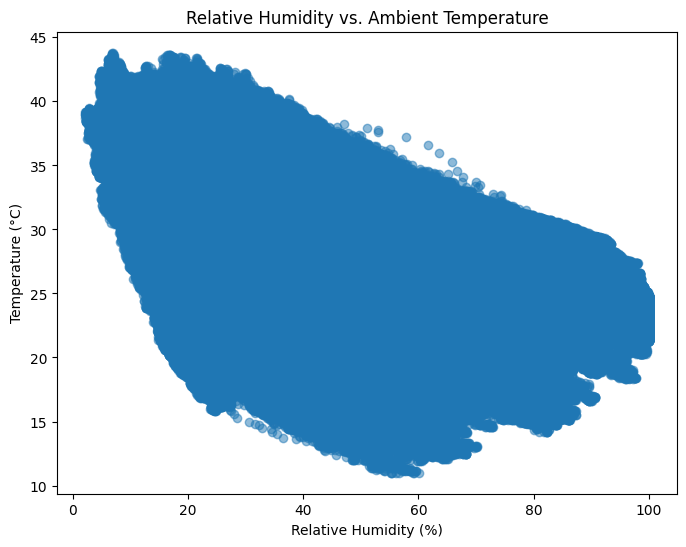

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.title('Relative Humidity vs. Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.savefig('../notebooks/figures/benin/rh_vs_tamb.png')
plt.show()

## Bubble Chart

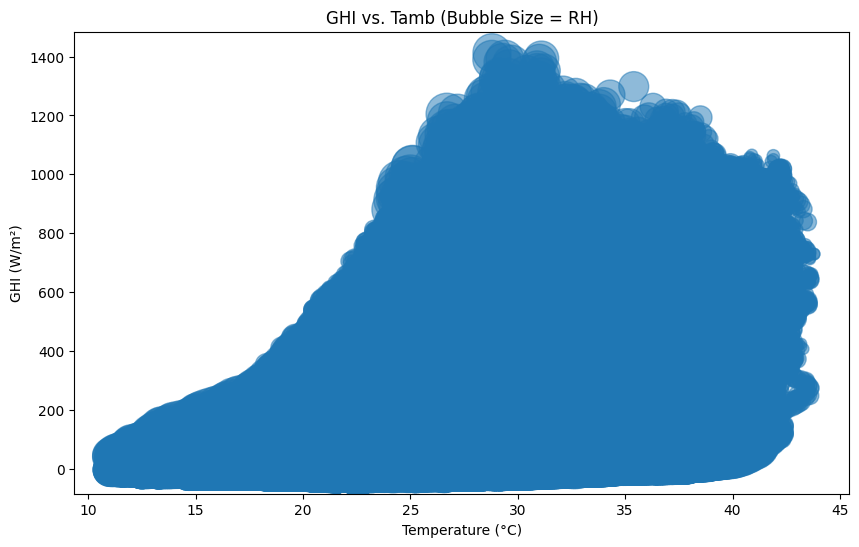

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*10, alpha=0.5)
plt.title('GHI vs. Tamb (Bubble Size = RH)')
plt.xlabel('Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.savefig('../notebooks/figures/benin/bubble_chart.png')
plt.show()